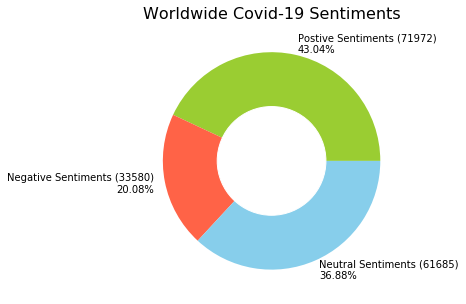

In [1]:
import pandas as pd
import numpy as np
import itertools
from textblob import TextBlob
import matplotlib.pyplot as plt

#df = pd.read_csv('E:/Software/Anaconda/corona_tweets_92/coronatweets_OUT.csv')
df = pd.read_csv('E:/Software/Anaconda/corona_tweets_92/coronatweets_OUT.csv', usecols = ['text','user_location'])
#LIMIT = 100
LIMIT = len(df)
#LIMIT = 10000
ds = {}
for row in itertools.islice(df.itertuples(), LIMIT):
    
    ds[row[2]] = TextBlob(row[1]).sentiment.polarity
    
totalS = len(ds.values())

ListValues = ds.values()
positiveS  = len([x for x in ListValues if x > 0])
negativeS  = len([x for x in ListValues if x < 0])
neutralS   = len([x for x in ListValues if x == 0])

ListValues = ds.values()
positiveS1 = round(((len([x for x in ListValues if x > 0])/totalS)* 100),2)
negativeS1 =  round(((len([x for x in ListValues if x < 0])/totalS)* 100),2)
neutralS1 =  round(((len([x for x in ListValues if x == 0])/totalS)* 100),2)

# donut chart representing nationwide total +ves, -ves and nuetral sentiments 
group_size = [positiveS, 
              negativeS, 
              neutralS]
             
group_labels = ['Postive Sentiments ('  + str(positiveS) + ')\n' + str(positiveS1)+'%' ,
                'Negative Sentiments (' + str(negativeS) + ')\n' + str(negativeS1)+'%',
                'Neutral Sentiments ('  + str(neutralS)  + ')\n' + str(neutralS1)+'%']

custom_colors = ['yellowgreen','tomato','skyblue']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Worldwide Covid-19 Sentiments', fontsize = 16)
plt.show()